#  Model for predicting fraudulent transactions

In [39]:
import pandas as pd #Import necessary libraries


## Read the dataset for a better understanding

In [40]:
df=pd.read_csv("Fraud.csv")
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


- step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

- type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

- amount - amount of the transaction in local currency.

- nameOrig - customer who started the transaction

- oldbalanceOrg - initial balance before the transaction

- newbalanceOrig - new balance after the transaction

- nameDest - customer who is the recipient of the transaction

- oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

- newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

- isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

- isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [41]:
df.shape # Shape of the dataset(Rows*columns)

(6362620, 11)

## Check for null values

In [42]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No null/missing values found

## Check for appropiriate data types

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Only 'type' , 'nameDest' , 'nameOrig' are object datatype which need to be changed for analysis.
'nameDest' and 'nameOrig' are just names of customers so are irrelevant which will be removed later.

## Describe the dataset to check for a better statistical analysis

In [44]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
import pandas as pd

# Assuming your data is in a DataFrame df
# Check for duplicates
duplicate_rows = df[df.duplicated()]

# Display duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## drop the object columns - nameDest and nameOrig

In [45]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)
df.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0,0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


In [9]:
df['isFlaggedFraud'].unique()

array([0, 1], dtype=int64)

## One-hot encoding for 'type' Column

In [47]:
import pandas as pd

# Assuming df is your original DataFrame

# One-hot encode the 'type' column
type_dummies = pd.get_dummies(df['type'], prefix='type')

# Concatenate these new columns to the original DataFrame
df = pd.concat([df, type_dummies], axis=1)

# Optionally, you can drop the original 'type' column if it's no longer needed
# df.drop('type', axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
print(df.head())


   step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  type_CASH_OUT  \
0             0.0        0               0         False          False   
1             0.0        0               0         False          False   
2             0.0        1               0         False          False   
3             0.0        1               0         False           True   
4             0.0        0               0         False          False   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
0       False          True        

In [48]:
df.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,False,True,False
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,False,True,False
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,False,True
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,False,True,False,False,False
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,False,True,False


 new columns are made after one hot encoding

In [8]:
df.dtypes

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type_CASH_IN      float64
type_CASH_OUT     float64
type_DEBIT        float64
type_PAYMENT      float64
type_TRANSFER     float64
dtype: object

## Co-relation matrix
To check the relation of features between the variable

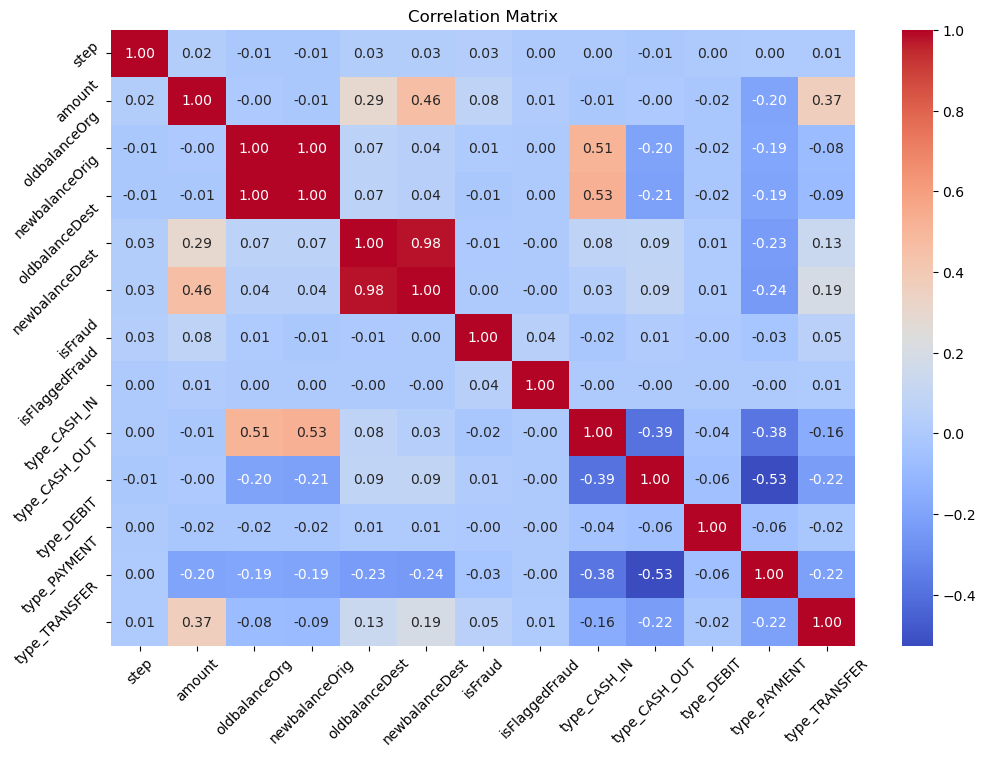

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# df = ... (your data loading process)

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Adjust layout for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Correlation Matrix")

# Show the plot
plt.show()


It appears that 'isFraud' is highly correlated with 'type_TRANSFER' (the square is red indicating a high positive correlation), and 'type_CASH_OUT' also seems to have a significant positive correlation with 'isFraud'. The variables 'oldbalanceOrg' and 'newbalanceOrig' also have a very high positive correlation, which is logical as they represent the old and new balance of the same entity.

## Train test Split And Implementing the Linear regression while dealing with the imbalance in data 

Confusion Matrix:
 [[1161877  109004]
 [    165    1478]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.96   1270881
           1       0.01      0.90      0.03      1643

    accuracy                           0.91   1272524
   macro avg       0.51      0.91      0.49   1272524
weighted avg       1.00      0.91      0.95   1272524

ROC AUC Score: 0.9640002245570364


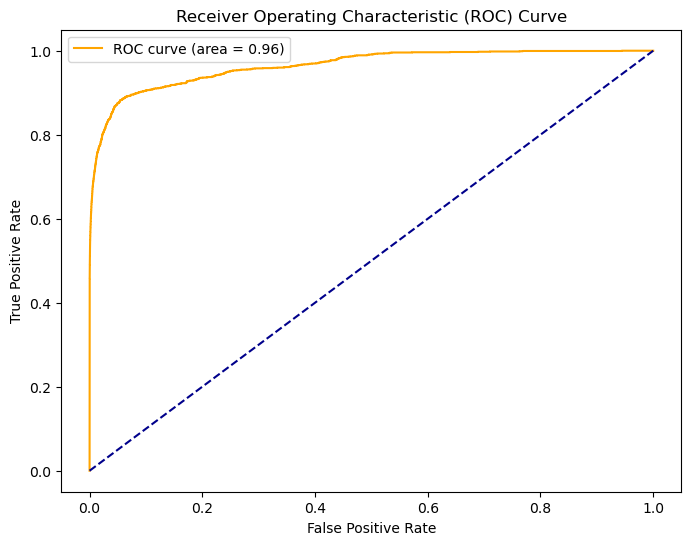

In [31]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Assuming 'df' is your DataFrame

# Define features (X) and target (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate probabilities for ROC AUC score
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### Confusion Matrix:
- True Negatives (TN): 1,161,877 - These are the non-fraudulent transactions that your model correctly identified as non-fraudulent.
- False Positives (FP): 109,004 - These are the non-fraudulent transactions that your model incorrectly identified as fraudulent.
- False Negatives (FN): 165 - These are the fraudulent transactions that your model failed to detect and incorrectly identified as non-fraudulent.
- True Positives (TP): 1,478 - These are the fraudulent transactions that your model correctly identified.

### Classification Report:
- Precision for Non-Fraudulent (0): Nearly 100% - Almost all transactions your model identified as non-fraudulent were indeed non-fraudulent.

- Recall for Non-Fraudulent (0): 91% - Your model correctly identified 91% of all actual non-fraudulent transactions.

- F1-Score for Non-Fraudulent (0): 96% - A high score, showing a good balance between precision and recall for non-fraudulent transactions.

- Precision for Fraudulent (1): 1% - Of all transactions your model identified as fraudulent, only 1% were actually fraudulent.

- Recall for Fraudulent (1): 90% - Your model correctly identified 90% of all actual fraudulent transactions.

- F1-Score for Fraudulent (1): 3% - A low score, indicating a poor balance between precision and recall for fraudulent transactions.

- Overall Accuracy: 91% - Overall, 91% of all transactions were correctly classified.

### ROC AUC Score: 0.964
0.964 is excellent and suggests that the model has a strong discriminative ability.


# Task Sheet


### 1. Data cleaning including missing values, outliers and multi-collinearity.
There are no missing values in the dataset.
'oldbalanceOrg' and 'newbalanceOrig' seem to have a very strong positive correlation, which is indicated by the intense red color. Similarly, 'oldbalanceDest' and 'newbalanceDest' also show a very strong positive correlation. These pairs are likely candidates for multicollinearity.

### 2. Describe your fraud detection model in elaboration.

- Objective: To predict whether a transaction is fraudulent.

- Type of Model: This is a binary classification model.

- Features Used:

Numerical Features: 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'. These features can provide direct indications of suspicious activities.

Categorical Features: 'type' of transaction, which can be one-hot encoded or label encoded for model training.
Engineered Features: New features can be created based on domain knowledge, like the difference between new and old balances, frequency of transactions, etc.

- Data Preprocessing:

 Handling missing values.
 Encoding categorical variables.
 Standardization
 Dealing with class imbalance, which is common in fraud detection. Using SMOTE (Synthetic Minority Over-sampling Technique) or    adjusting class weights can be used.
 Model Training and Validation:

- Splitting the dataset into training and validation sets to assess model performance.
 Using appropriate metrics for imbalanced classification, such as Precision, Recall, F1-Score, ROC-AUC, etc.
 Model Evaluation:

 Evaluating the model on a separate test set.

### 3. How did you select variables to be included in the model?
-  Variables directly related to transaction details (like 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest') are inherently important because they provide direct information about the transaction.
- Transaction Type: The 'type' of transaction might have a pattern in fraudulent activities, making it a potentially useful feature.


### 4. What are the key factors that predict fraudulent customer?
- Transaction Amount: Unusually high or low transaction amounts can be suspicious.
- A significant discrepancy between the old and new balances in either the originating or the destination account might indicate fraud.
- Certain types of transactions might be more prone to fraud. For instance, transfers and cash outs could be more susceptible than debit transactions.

### 5. Do these factors make sense? If yes, How? If not, How not?
 Yes, the factors listed do make sense in the context of detecting fraudulent transactions.

- Transaction Amount (Very High or Very Low):
If someone suddenly moves a lot of money, it's like a red flag. It's unusual and might mean someone is trying to steal a big amount.
Small amounts can also be suspicious. Sometimes, bad guys do small transactions first to see if they can get away with it before they try for bigger amounts.
Changes in Account Balances:

- Types of Transactions That Might Be Risky:
Some ways of moving money are more likely to be used for bad things

 - Transferring Money: 
 This is when you move money from one account to another. Bad guys might do this to move stolen money around.
 
 - Cashing Out: 
 This means taking money out of an account, maybe as cash or buying something. This can be a final step for a thief to get hold of the money they stole.

### 6. What kind of prevention should be adopted while company update its infrastructure?
- Enhanced Security Protocols:
Implement robust cybersecurity measures to protect against hacking, phishing, and other cyber threats.
Regularly update security software and protocols to defend against new types of attacks.

- Data Encryption:
Encrypt sensitive data, both in transit and at rest, to prevent unauthorized access.

- Access Controls:
Implement strict access controls to ensure that only authorized personnel can access sensitive systems and data

### 7. Assuming these actions have been implemented, how would you determine if they work?
- Monitor Key Metrics:
Track the frequency and severity of security incidents and fraud cases.

- Incident Response Testing:
Regularly test the incident response plan to ensure the organization can effectively respond to and recover from security breaches.

- Feedback from Employees and Customers:
Collect feedback from employees and customers on the usability and effectiveness of security measures.